# Preamble

In [18]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
from geodatasets import get_path
import numpy as np
import xarray as xr
import netCDF4
import matplotlib.colors as mcolors

In [2]:
path_Mankoff2019Liquid = "/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/freshwater/freshwater/"

Open data but sum to make it easier for computer to handle

In [3]:
def open_chunks_to_avoid_overload():
    dsMankoff2019LandRACMO = xr.open_dataset(path_Mankoff2019Liquid + "land/RACMO.nc", engine="netcdf4")
    dsMankoff2019LandRACMO_chunk = dsMankoff2019LandRACMO['discharge'].sum(dim='station').sel(time=slice('2000-01-01', '2020-12-31'))
    # do it for ice
    dsMankoff2019IceRACMO = xr.open_mfdataset(path_Mankoff2019Liquid + "ice/RACMO.nc", engine="netcdf4")
    dsMankoff2019IceRACMO_chunk = dsMankoff2019IceRACMO['discharge'].sum(dim='station').sel(time=slice('2000-01-01', '2020-12-31'))
    return dsMankoff2019LandRACMO_chunk, dsMankoff2019IceRACMO_chunk
# dsMankoff2019LandRACMO_chunk, dsMankoff2019IceRACMO_chunk = open_chunks_to_avoid_overload()

# do the same for MAR
def open_chunks_to_avoid_overload_MAR():
    '''Open a chunk of the MAR dataset to avoid overload'''
    dsMankoff2019LandMAR = xr.open_mfdataset(path_Mankoff2019Liquid + "land/MAR.nc", engine="netcdf4")
    dsMankoff2019LandMAR_chunk = dsMankoff2019LandMAR['discharge'].sum(dim='station').sel(time=slice('2000-01-01', '2020-12-31'))
    # do it for ice
    # dsMankoff2019IceMAR = xr.open_dataset(path_Mankoff2019Liquid + "ice/MAR.nc")
    # dsMankoff2019IceMAR_chunk = dsMankoff2019IceMAR['discharge'].sum(dim='station').sel(time=slice('2000-01-01', '2020-12-31'))
    return dsMankoff2019LandMAR_chunk
dsMankoff2019LandMAR_chunk = open_chunks_to_avoid_overload_MAR()
dsMankoff2019LandRACMO_chunk, dsMankoff2019IceRACMO_chunk = open_chunks_to_avoid_overload()[1]

In [4]:
to_Gt_per_month = 1e-9 * 86400 * 365  /12
(dsMankoff2019IceRACMO_chunk*to_Gt_per_month).plot()
(dsMankoff2019LandRACMO_chunk*to_Gt_per_month).plot()
(dsMankoff2019LandMAR_chunk*to_Gt_per_month).plot()
plt.legend(['ice_RACMO', 'land_RACMO', 'land_MAR'])
plt.xlabel('')
plt.ylabel('Discharge [Gt/month]')
plt.title('Mankoff2019 Monthly Mean Greenland Liquid Discharge')
plt.xlim(pd.to_datetime(['2018-01-01', '2019-12-31']))

NameError: name 'dsMankoff2019IceRACMO_chunk' is not defined

([<matplotlib.axis.XTick at 0x1790f4ad0>,
 [Text(2000, 0, '2000'),
  Text(2004, 0, '2004'),
  Text(2008, 0, '2008'),
  Text(2012, 0, '2012'),
  Text(2016, 0, '2016'),
  Text(2020, 0, '2020')])

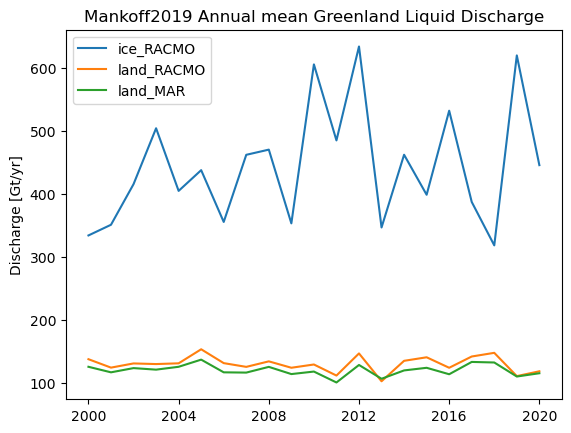

In [41]:
to_Gt_per_year = 1e-9 * 86400 * 365
# average over the year
(dsMankoff2019IceRACMO_chunk*to_Gt_per_year).groupby('time.year').mean().plot()
(dsMankoff2019LandRACMO_chunk*to_Gt_per_year).groupby('time.year').mean().plot()
(dsMankoff2019LandMAR_chunk*to_Gt_per_year).groupby('time.year').mean().plot()
plt.legend(['ice_RACMO', 'land_RACMO', 'land_MAR'])
plt.xlabel('')
plt.ylabel('Discharge [Gt/yr]')
plt.title('Mankoff2019 Annual mean Greenland Liquid Discharge')
# set xticks every 4 years
plt.xticks(np.arange(2000, 2021, 4))

## Noel Downscaled runoff

In [43]:
path_runoffNoel = "/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/Data/Runoff/runoff/runoff.2018_AMJ.BN_RACMO2.3p2_ERA5_3h_FGRN055.1km.DD.nc"

In [44]:
# open path_runoffNoel
dsNoel = xr.open_dataset(path_runoffNoel)
dsNoel

<xarray.Dataset>
Dimensions:     (time: 91, x: 1496, y: 2700)
Coordinates:
  * time        (time) datetime64[ns] 2018-04-01 2018-04-02 ... 2018-06-30
  * x           (x) float32 -6.39e+05 -6.38e+05 -6.37e+05 ... 8.55e+05 8.56e+05
  * y           (y) float32 -3.355e+06 -3.354e+06 ... -6.566e+05 -6.556e+05
Data variables:
    LON         (y, x) float32 ...
    LAT         (y, x) float32 ...
    runoffcorr  (time, y, x) float32 ...
Attributes:
    title:        Daily mean runoff field at 1km (RACMO2.3p2 FGRN055 ERA)
    institution:  IMAU (Brice Noel)
    grid:         Map Projection:Polar Stereographic Ellipsoid - Map Referenc...
    history:      libUN (2013.05.22) - Sat Aug  8 19:22:52 2020
    netcdf:       4.7.4 of Apr 18 2020 10:56:44 $

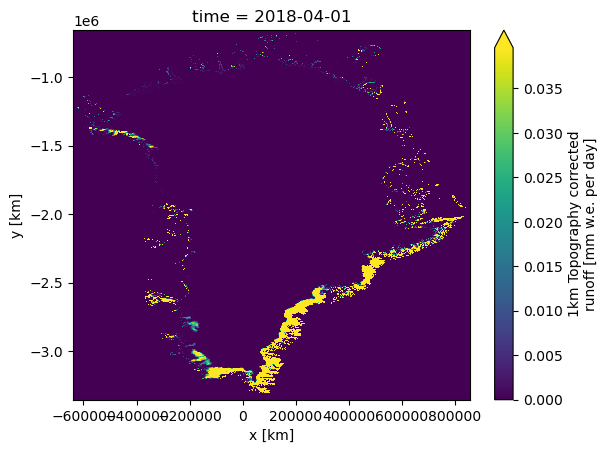

In [48]:
# plot dfNoel for time = -
dsNoel['runoffcorr'].isel(time=0).plot(robust=True)

# basins

In [6]:
import geopandas as gpd

# Path to your GeoPackage file
gpkg_file = '/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/Data/Runoff/Mankoff_2019/ice/basins.gpkg'

# Read the GeoPackage file
gdf = gpd.read_file(gpkg_file)

# Display some basic information
print(gdf.head())
print(gdf.crs)
gdf.plot()

   cat       area                                           geometry
0    6  1280000.0  POLYGON ((205800.000 -673700.000, 205800.000 -...
1    1   110000.0  POLYGON ((210200.000 -673700.000, 210200.000 -...
2    3   320000.0  POLYGON ((212400.000 -673900.000, 212400.000 -...
3   12   210000.0  POLYGON ((215400.000 -674000.000, 215700.000 -...
4   12   210000.0  POLYGON ((215400.000 -674000.000, 215000.000 -...
EPSG:3413


In [19]:
# Path to your GeoPackage file
gpkg_file = '/Users/annek/Library/CloudStorage/OneDrive-SharedLibraries-NIOZ/PhD Anneke Vries - General/Data/Runoff/Mankoff_2019/land/basins_filled.gpkg'
# Read the GeoPackage file
gdf = gpd.read_file(gpkg_file)

# Display some basic information
print(gdf.head())
print(gdf.crs)
gdf


   cat                                           geometry
0    1  POLYGON ((210700.000 -666000.000, 210700.000 -...
1    7  POLYGON ((213000.000 -666200.000, 213000.000 -...
2   19  POLYGON ((214400.000 -666200.000, 214400.000 -...
3   32  POLYGON ((215700.000 -666500.000, 215700.000 -...
4   12  POLYGON ((206600.000 -666800.000, 206700.000 -...
EPSG:3413


,cat,geometry
0,1,"POLYGON ((210700.000 -666000.000, 210700.000 -..."
1,7,"POLYGON ((213000.000 -666200.000, 213000.000 -..."
2,19,"POLYGON ((214400.000 -666200.000, 214400.000 -..."
3,32,"POLYGON ((215700.000 -666500.000, 215700.000 -..."
4,12,"POLYGON ((206600.000 -666800.000, 206700.000 -..."
...,...,...
31051,182532,"POLYGON ((66900.000 -3344100.000, 66800.000 -3..."
31052,182538,"POLYGON ((55900.000 -3345200.000, 56300.000 -3..."
31053,182545,"POLYGON ((53700.000 -3342800.000, 53600.000 -3..."
31054,182524,"POLYGON ((64000.000 -3344500.000, 63900.000 -3..."


<Axes: >

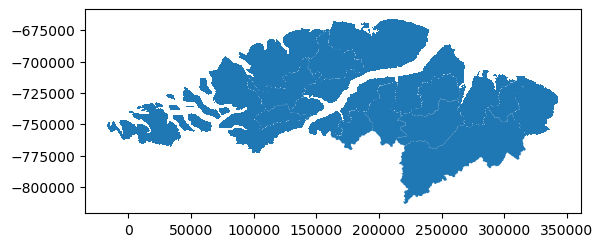

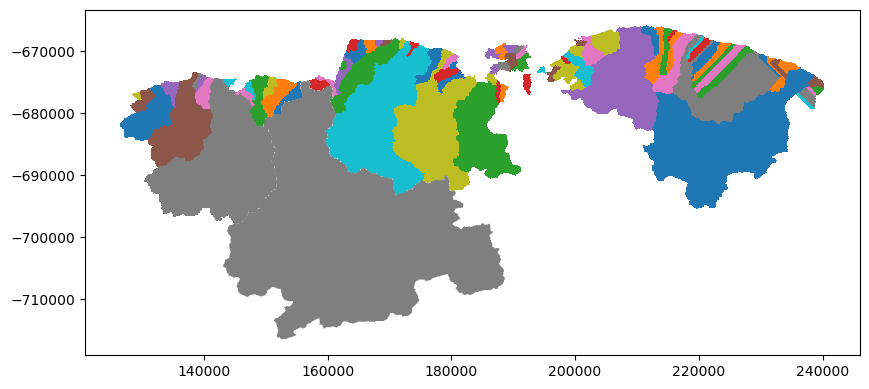

In [27]:
# Plot each polygon with a different color
fig, ax = plt.subplots(1, 1, figsize=(10, 10))

# Generate a list of colors
colors = list(mcolors.TABLEAU_COLORS.keys())
color_map = {cat: colors[i % len(colors)] for i, cat in enumerate(gdf['cat'])}
gdf1000 = gdf.iloc[0:100]
# Plot each polygon with the corresponding color
for cat, geom in zip(gdf['cat'], gdf1000['geometry']):
    gpd.GeoSeries([geom]).plot(ax=ax, color=mcolors.TABLEAU_COLORS[color_map[cat]])

# Optionally, add a legend
legend_labels = [f'Cat {cat}' for cat in gdf1000['cat']]
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=mcolors.TABLEAU_COLORS[color], markersize=10) for color in color_map.values()]

# Show plot
plt.show()

In [29]:
import geopandas as gpd
import rasterio
from rasterio.features import rasterize
import numpy as np
import xarray as xr



# Define the output raster size and transform
bounds = gdf.total_bounds
minx, miny, maxx, maxy = bounds
resolution = 1000  # Define your resolution
width = int((maxx - minx) / resolution)
height = int((maxy - miny) / resolution)
transform = rasterio.transform.from_origin(minx, maxy, resolution, resolution)

# Create a (width, height) shape with catchment values
shapes = ((geom, value) for geom, value in zip(gdf.geometry, gdf['cat']))
raster = rasterize(shapes, out_shape=(height, width), transform=transform, fill=np.nan)

# Convert to xarray.DataArray
coords = {
    'y': np.arange(maxy, miny, -resolution),
    'x': np.arange(minx, maxx, resolution),
}
da = xr.DataArray(raster, coords=coords, dims=('y', 'x'))

# Add metadata (optional)
da.attrs['crs'] = 'EPSG:3413'

print(da)


ValueError: conflicting sizes for dimension 'x': length 1485 on the data but length 1486 on coordinate 'x'